# Análisis ConnectaTel

Como **analista de datos**, tu objetivo es evaluar el **comportamiento de los clientes** de una empresa de telecomunicaciones en Latinoamérica, ConnectaTel. 

Trabajaremos con información registrada **hasta el año 2024**, lo cual permitirá analizar el comportamiento del negocio dentro de ese periodo.

Para ello trabajarás con tres datasets:  

- **plans.csv** → información de los planes actuales (precio, minutos incluidos, GB incluidos, costo por extra)  
- **users.csv** → información de los clientes (edad, ciudad, fecha de registro, plan, churn)  
- **usage.csv** → detalle del **uso real** de los servicios (llamadas y mensajes)  

Deberás **explorar**, **limpiar** y **analizar** estos datos para construir un **perfil estadístico** de los clientes, detectar **comportamientos atípicos** y crear **segmentos de clientes**.  

Este análisis te permitirá **identificar patrones de consumo**, **diseñar estrategias de retención** y **sugerir mejoras en los planes** ofrecidos por la empresa.

> 💡 Antes de empezar, recuerda pensar de forma **programática**: ¿qué pasos necesitas? ¿En qué orden? ¿Qué quieres medir y por qué?


--- 
## 🧩 Paso 1: Cargar y explorar

Antes de limpiar o combinar los datos, es necesario **familiarizarte con la estructura de los tres datasets**.  
En esta etapa, validarás que los archivos se carguen correctamente, conocerás sus columnas y tipos de datos, y detectarás posibles inconsistencias.

### 1.1 Carga de datos y vista rápida

**🎯 Objetivo:**  
Tener los **3 datasets listos en memoria**, entender su contenido y realizar una revisión preliminar.

**Instrucciones:**  
- Importa las librerías necesarias (por ejemplo `pandas`, `seaborn`, `matplotlib.pyplot`)
- Carga los archivos CSV usando `pd.read_csv()`:
  - **`/datasets/plans.csv`**  
  - **`/datasets/users_latam.csv`**  
  - **`/datasets/usage.csv`**  
- Guarda los DataFrames en las variables: `plans`, `users`, `usage`.  
- Muestra las primeras filas de cada DataFrame usando `.head()`.


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np # importar librerías

In [4]:
# cargar archivos
plans = pd.read_csv('/datasets/plans.csv')
users = pd.read_csv('/datasets/users_latam.csv') #completa el código
usage = pd.read_csv('/datasets/usage.csv') #completa el código

In [5]:
plans.head(5)# mostrar las primeras 5 filas de plans

,plan_name,messages_included,gb_per_month,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,Basico,100,5,100,12,1.2,0.08,0.10
1,Premium,500,20,600,25,1.0,0.05,0.07


In [6]:
users.head(5)# mostrar las primeras 5 filas de users

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,10000,Carlos,Garcia,38,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN
1,10001,Mateo,Torres,53,?,2022-01-01 06:34:17.914478619,Basico,NaN
2,10002,Sofia,Ramirez,57,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN
3,10003,Mateo,Ramirez,69,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN
4,10004,Mateo,Torres,63,GDL,2022-01-02 02:17:11.657914478,Basico,NaN


In [7]:
usage.head(5)# mostrar las primeras 5 filas de usage

,id,user_id,type,date,duration,length
0,1,10332,call,2024-01-01 00:00:00.000000000,0.09,NaN
1,2,11458,text,2024-01-01 00:06:30.969774244,NaN,39.0
2,3,11777,text,2024-01-01 00:13:01.939548488,NaN,36.0
3,4,10682,call,2024-01-01 00:19:32.909322733,1.53,NaN
4,5,12742,call,2024-01-01 00:26:03.879096977,4.84,NaN


**Tip:** Si no usas `print()` la tabla se vera mejor.

### 1.2 Exploración de la estructura de los datasets

**🎯 Objetivo:**  
Conocer la **estructura de cada dataset**, revisar cuántas filas y columnas tienen, identificar los **tipos de datos** de cada columna y detectar posibles **inconsistencias o valores nulos** antes de iniciar el análisis.

**Instrucciones:**  
- Revisa el **número de filas y columnas** de cada dataset usando `.shape`.  
- Usa `.info()` en cada DataFrame para obtener un **resumen completo** de columnas, tipos de datos y valores no nulos.  

In [8]:
# revisar el número de filas y columnas de cada dataset
print("plans", plans.shape)
print("users", users.shape)
print("usage", usage.shape)

plans (2, 8)
users (4000, 8)
usage (40000, 6)


In [9]:
plans.info() # inspección de plans con .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   plan_name          2 non-null      object 
 1   messages_included  2 non-null      int64  
 2   gb_per_month       2 non-null      int64  
 3   minutes_included   2 non-null      int64  
 4   usd_monthly_pay    2 non-null      int64  
 5   usd_per_gb         2 non-null      float64
 6   usd_per_message    2 non-null      float64
 7   usd_per_minute     2 non-null      float64
dtypes: float64(3), int64(4), object(1)
memory usage: 256.0+ bytes


In [10]:
users.info()# inspección de users con .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     4000 non-null   int64 
 1   first_name  4000 non-null   object
 2   last_name   4000 non-null   object
 3   age         4000 non-null   int64 
 4   city        3531 non-null   object
 5   reg_date    4000 non-null   object
 6   plan        4000 non-null   object
 7   churn_date  466 non-null    object
dtypes: int64(2), object(6)
memory usage: 250.1+ KB


In [11]:
usage.info() # inspección de usage con .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        40000 non-null  int64  
 1   user_id   40000 non-null  int64  
 2   type      40000 non-null  object 
 3   date      39950 non-null  object 
 4   duration  17924 non-null  float64
 5   length    22104 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 1.8+ MB


---

## 🧩Paso 2: Identificación de problemas de calidad de datos

### 2.1 Revisión de valores nulos

**🎯 Objetivo:**  
Detectar la presencia y magnitud de valores faltantes para evaluar si afectan el análisis o requieren imputación/eliminación.

**Instrucciones:**  
- Cuenta valores nulos por columna para cada dataset.
- Calcula la proporción de nulos por columna para cada dataset.

El dataset `plans` solamente tiene 2 renglones y se puede observar que no tiene ausentes, por ello no necesita exploración adicional.

<br>
<details>
<summary>Haz clic para ver la pista</summary>
Usa `.isna().sum()` para contar valores nulos y usa `.isna().mean()` para calcular la proporción.

In [12]:
# cantidad de nulos para users
print(users.isnull().sum())
# Cantidad de valores nulos)
print(users.isna().mean())# Proporción de valores nulos)

user_id          0
first_name       0
last_name        0
age              0
city           469
reg_date         0
plan             0
churn_date    3534
dtype: int64
user_id       0.00000
first_name    0.00000
last_name     0.00000
age           0.00000
city          0.11725
reg_date      0.00000
plan          0.00000
churn_date    0.88350
dtype: float64


In [13]:
# cantidad de nulos para usage
print(usage.isnull().sum())
print(usage.isna().mean())

id              0
user_id         0
type            0
date           50
duration    22076
length      17896
dtype: int64
id          0.00000
user_id     0.00000
type        0.00000
date        0.00125
duration    0.55190
length      0.44740
dtype: float64


✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico al final del bloque. Incluye qué ves y que acción recomendarías para cada caso.

💡 **Nota:** Justifica tus decisiones brevemente (1 línea por caso).
* Hint:
 - Si una columna tiene **más del 80–90% de nulos**, normalmente se **ignora o elimina**.  
 - Si tiene **entre 5% y 30%**, generalmente se **investiga para imputar o dejar como nulos**.  
 - Si es **menor al 5%**, suele ser un caso simple de imputación o dejar como nulos. 
 
 ---

**Valores nulos**  
- ¿Qué columnas tienen valores faltantes y en qué proporción?
  - Primero, tomaremos la información de 'users':
    -En este df dos columnas presentan datos nulos:
     -'city' con  469 valores nulos de 4000, lo que equivale al 11.7%.
     -'churn_date' con 3534 valores nulos de 4000, lo que equivale al 88.3%
  - Segundo, tomaremos la información de 'usage':
   - En este df 3 columnas presentan datos nulos:
     - 'date' con 50 valores nulos de 40000, lo que equivale al 0.1%
     - 'duration' con 22076 valores nulos de 40000, lo que equivale al 55.1%
     - 'length' con 17896 valores nulos de 40000, lo que equivale al 44.7%
- Indica qué harías: ¿imputar, eliminar, ignorar?
  - 'users':
    - 'city' por el tipo de datos, es mas recomendable dejar como nulos.
    - 'churn_date' ya que el porcentage de datos nulos es tan alto, lo más recomendable sería ignorar la columna en su totalidad.
  - 'usage':
    - 'date' debido a que el porcentaje es tan mínimo, esos datos serán simplemente ignorados
    - 'duration' se buscará imputar los datos, verificado sí es mejor usar el promedio o la mediana.
    - 'length'  se buscará imputar los datos, verificado sí es mejor usar el promedio o la mediana

### 2.2 Detección de valores inválidos y sentinels

🎯 **Objetivo:**  
Identificar sentinels: valores que no deberían estar en el dataset.

**Instrucciones:**
- Explora las columnas numéricas con **un resumen estadístico** y describe brevemente que encontraste.
- Explora las columnas categóricas **relevantes**, revisando sus valores únicos y describe brevemente que encontraste.


El dataset `plans` solamente tiene 2 renglones, por ello no necesita exploración adicional.

In [14]:
users[["user_id", "age"]].median()
users[["user_id", "age"]].describe()

 # explorar columnas numéricas de users

,user_id,age
count,4000.000000,4000.000000
mean,11999.500000,33.739750
std,1154.844867,123.232257
min,10000.000000,-999.000000
25%,10999.750000,32.000000
50%,11999.500000,47.000000
75%,12999.250000,63.000000
max,13999.000000,79.000000


- La columna `user_id` los valores son los esperados ya que se tratan de números de identificación para el cliente
- La columna `age` existen valores que se salen de l norma como es -999 en edad mínima, la mediana de los datos es 47 mientras que el promedio es de 33, lo cual podría mostrar sesgo a la derecha en los datos, por lo cual sería mejor sustituir con la mediana

In [15]:
usage[["id","user_id"]].describe() # explorar columnas numéricas de usage

,id,user_id
count,40000.00000,40000.000000
mean,20000.50000,12002.405975
std,11547.14972,1157.279564
min,1.00000,10000.000000
25%,10000.75000,10996.000000
50%,20000.50000,12013.000000
75%,30000.25000,13005.000000
max,40000.00000,13999.000000


- Las columnas `id` y `user_id`...Haz doble clic en este bloque y escribe qué ves.
- Las columnas las columnas son relacionadas a números de identificación y no aparecen números negativos que puedan notar errores en la captura

In [16]:
users[["city","plan"]].describe() # explorar columnas categóricas de users
columnas_user = ['city', 'plan']


- La columna `city` se tienen 7 valores únicos, siendo Bogotá el más común con una frecuencia de 808, será mejor ignorarlos ya que, de usarse otra de las ciudades para rellenar la información, esto podría cambiar el análisis.
- La columna `plan` se tiene 2 valores únicos, siendo Básico el plan que se repite con mayor frecuencia de 2595


In [17]:
# explorar columna categórica de usage
usage['type'].describe() # completa el código

count     40000
unique        2
top        text
freq      22092
Name: type, dtype: object

- La columna `type` en esta columna existen 2 valores únicos, siendo text el más común con 22092


---
✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico. Incluye qué ves y que acción recomendarías para cada caso. 

**Valores inválidos o sentinels**  
- ¿En qué columnas encontraste valores inválidos o sentinels?  
- ¿Qué acción tomarías?  

### 2.3 Revisión y estandarización de fechas

**🎯 Objetivo:**  
Asegurar que las columnas de fecha estén correctamente formateadas y detectar años fuera de rango que indiquen errores de captura.

**Instrucciones:**  
- Convierte las columnas de fecha a tipo fecha y asegurate de que el código sea a prueba de errores.  
- Revisa cuántas veces aparece cada año.
- Identifica fechas imposibles (ej. años futuros o negativos).

Toma en cuenta que tenemos datos registrados hasta el año 2024.

In [18]:
# Convertir a fecha la columna `reg_date` de users
users['reg_date'] = pd.to_datetime(users['reg_date'])
users['reg_date'].dtype # completa el código

dtype('<M8[ns]')

In [19]:
# Convertir a fecha la columna `date` de usage
usage['date'] = pd.to_datetime(usage['date'])
usage['date'].dtype # completa el código

dtype('<M8[ns]')

In [20]:
print("Primera fecha:", users['reg_date'].min())
print("Última fecha:", users['reg_date'].max()) # Revisar los años presentes en `reg_date` de users


Primera fecha: 2022-01-01 00:00:00
Última fecha: 2026-05-10 00:00:00


En `reg_date`, los años deberpian de ser de maximo de 2024, sin embargo, se ven valores 2026, por lo que es importante revisar con mayor cautela esta columna. tambien el año más bajo es 2022, en el analisis dice "hasta 2024", por lo que queda duda sí esto podría ser un dato atípico o no"

In [21]:
print("Primera fecha:", usage['date'].min())
print("Última fecha:", usage['date'].max())# Revisar los años presentes en `date` de usage


Primera fecha: 2024-01-01 00:00:00
Última fecha: 2024-06-30 00:00:00


En `date`, todas las fechas se encuentran contenidas en el año 2024, por lo que no hace falta tomar más acciones

✍️ **Comentario**: escribe tu diagnóstico, e incluye **qué acción recomendarías** para cada caso:

**Fechas fuera de rango**  
- ¿Aparecen años imposibles? (años muy viejos o sin transcurrir al momento de guardar los datos)
- ¿Qué harías con ellas?

---

## 🧩Paso 3: Limpieza básica de datos

### 3.1 Corregir sentinels y fechas imposibles
**🎯 Objetivo:**  
Aplicar reglas de limpieza para reemplazar valores sentinels y corregir fechas imposibles.

**Instrucciones:**  
- En `age`, reemplaza el sentinel **-999** con la mediana.
- En `city`, reemplaza el sentinel `"?"` por valores nulos (`pd.NA`).  
- Marca como nulas (`pd.NA`) las fechas fuera de rango.

In [22]:
# Reemplazar -999 por la mediana de age
age_mediana = ...
users['age'] = users ['age'].replace(-999,47)

# Verificar cambios
users['age'].describe()

count    4000.000000
mean       48.122250
std        17.690408
min        18.000000
25%        33.000000
50%        47.000000
75%        63.000000
max        79.000000
Name: age, dtype: float64

In [23]:
users['city']= users['city'].replace("?", "NA") # Reemplazar ? por NA en city


print("Valores '?' restantes:", (users['city'] == "?").sum())

users['city'].value_counts()# Verificar cambios


Valores '?' restantes: 0


Bogotá      808
CDMX        730
Medellín    616
GDL         450
Cali        424
MTY         407
NA           96
Name: city, dtype: int64

In [24]:

 users['reg_date'].dt.year.value_counts() # Marcar fechas futuras como NA para reg_date
 users['reg_date'].head()
 users['reg_date_year']=users['reg_date'].dt.year.replace(2026, np.nan)
users['reg_date_year'].describe()
# Verificar cambios



count    3960.000000
mean     2023.004040
std         0.817208
min      2022.000000
25%      2022.000000
50%      2023.000000
75%      2024.000000
max      2024.000000
Name: reg_date_year, dtype: float64

### 3.2 Corregir sentinels y fechas imposibles
**🎯 Objetivo:**  
Decidir qué hacer con los valores nulos según su proporción y relevancia.

**Instrucciones:**
- Verifica si los nulos en `duration` y `length` son **MAR**(Missing At Random) revisando si dependen de la columna `type`.  
  Si confirmas que son MAR, **déjalos como nulos** y justifica la decisión.

In [25]:
usage[["duration","type"]].head(50)
# Verificación MAR en usage (Missing At Random) para duration


,duration,type
0,0.09,call
1,NaN,text
2,NaN,text
3,1.53,call
4,4.84,call
5,4.68,call
6,3.27,call
7,4.81,call
8,NaN,text
9,NaN,text


In [26]:
usage[["length","type"]].head(50) # Verificación MAR en usage (Missing At Random) para length


,length,type
0,NaN,call
1,39.0,text
2,36.0,text
3,NaN,call
4,NaN,call
5,NaN,call
6,NaN,call
7,NaN,call
8,44.0,text
9,70.0,text


Haz doble clic aquíy escribe que tu diagnostico de nulos en `duration` y `length`

Para "duration" se determinó que no se realizaría ninguna acción debido a que los "text" no tienen duración en minutos como "calls".

Ocurre una situación similar con "length" ya que "calls" no se pueden medir por extensión como lo hace "text"




## 🧩Paso 4: Summary statistics de uso por usuario


### 4.1 Agrupación por comportamiento de uso

🎯**Objetivo**: Resumir las variables clave de la tabla `usage` **por usuario**, creando métricas que representen su comportamiento real de uso histórico. 

**Instrucciones:**: 
1. Construye una tabla agregada de `usage` por `user_id` que incluya:
- número total de mensajes  
- número total de llamadas  
- total de minutos de llamadas

2. Renombra las columnas para que tengan nombres claros:  
- `cant_mensajes`  
- `cant_llamadas`  
- `cant_minutos_llamada`
3. Combina esta tabla con `users`.

In [27]:
# Columnas auxiliares
usage["is_text"] = (usage["type"] == "text").astype(int) #conocer el total de mensajes
usage["is_call"] = (usage["type"] == "call").astype(int) #conocer el total de llamadas

# Agrupar información por usuario
usage_agg = usage.groupby("user_id")[["is_text","is_call","duration"]].sum().reset_index()

# observar resultado
usage_agg.head(3)

,user_id,is_text,is_call,duration
0,10000,7,3,23.70
1,10001,5,10,33.18
2,10002,5,2,10.74


In [28]:
# Renombrar columnas
usage_agg=usage_agg.rename(columns={"is_text":"cant_mensajes", "is_call":"cant_llamadas","duration":"cant_minutos_llamada"}) 
# observar resultado
usage_agg.head(3)

,user_id,cant_mensajes,cant_llamadas,cant_minutos_llamada
0,10000,7,3,23.70
1,10001,5,10,33.18
2,10002,5,2,10.74


In [29]:
# Combinar la tabla agregada con el dataset de usuarios
user_profile = pd.merge(usage_agg, users, on = "user_id")
user_profile.head(5)


,user_id,cant_mensajes,cant_llamadas,cant_minutos_llamada,first_name,last_name,age,city,reg_date,plan,churn_date,reg_date_year
0,10000,7,3,23.70,Carlos,Garcia,38,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,2022.0
1,10001,5,10,33.18,Mateo,Torres,53,NA,2022-01-01 06:34:17.914478619,Basico,NaN,2022.0
2,10002,5,2,10.74,Sofia,Ramirez,57,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,2022.0
3,10003,11,3,8.99,Mateo,Ramirez,69,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,2022.0
4,10004,4,3,8.01,Mateo,Torres,63,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,2022.0


### 4.2 4.2 Resumen estadístico por usuario durante el 2024

🎯 **Objetivo:** Analizar las columnas numéricas y categóricas de los usuarios, para identificar rangos, valores extremos y distribución de los datos antes de continuar con el análisis.

**Instrucciones:**  
1. Para las columnas **numéricas** relevantes, obtén un resumen estadístico (media, mediana, mínimo, máximo, etc.).  
2. Para la columna **categórica** `plan`, revisa la distribución en **porcentajes** de cada categoría.

In [30]:
user_profile[["cant_mensajes", "cant_llamadas","age"]].describe() # Resumen estadístico de las columnas numéricas


,cant_mensajes,cant_llamadas,age
count,3999.000000,3999.000000,3999.000000
mean,5.524381,4.478120,48.124531
std,2.358416,2.144238,17.692032
min,0.000000,0.000000,18.000000
25%,4.000000,3.000000,33.000000
50%,5.000000,4.000000,47.000000
75%,7.000000,6.000000,63.000000
max,17.000000,15.000000,79.000000


In [31]:
user_profile["plan"].value_counts(normalize=True)*100
# Distribución porcentual del tipo de plan


Basico     64.866217
Premium    35.133783
Name: plan, dtype: float64

---

## 🧩Paso 5: Visualización de distribuciones (uso y clientes) y outliers


### 5.1 Visualización de Distribuciones

🎯 **Objetivo:**  
Entender visualmente cómo se comportan las variables clave tanto de **uso** como de **clientes**, observar si existen diferencias según el tipo de plan, y analizar la **forma de la distribución**.

**Instrucciones:**  
Graficar **histogramas** para las siguientes columnas:  
- `age` (edad de los usuarios)
- `cant_mensajes`
- `cant_llamadas`
- `total_minutos_llamada` 

Después de cada gráfico, escribe un **insight** respecto al plan y la variable, por ejemplo:  
- "Dentro del plan Premium, hay mayor proporción de..."  
- "Los usuarios Básico tienden a hacer ... llamadas y enviar ... mensajes."  o "No existe algún patrón."
- ¿Qué tipo de distribución tiene ? (simétrica, sesgada a la derecha o a la izquierda) 

**Hint**  
Para cada histograma, 
- Usa `hue='plan'` para ver cómo varían las distribuciones según el plan (Básico o Premium).
- Usa `palette=['skyblue','green']`
- Agrega título y etiquetas

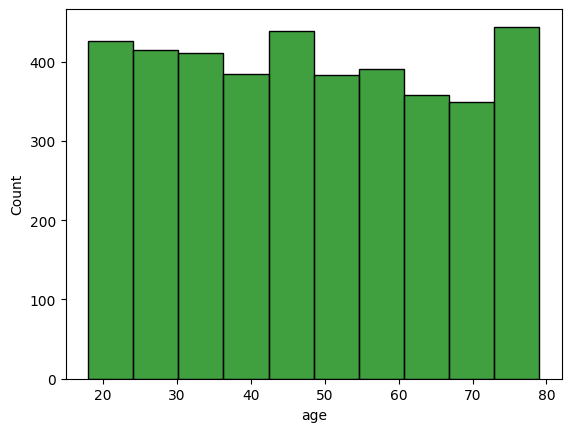

In [32]:
# Histograma para visualizar la edad (age)
sns.histplot(user_profile["age"],bins=10,color='green')
plt.show()

💡Insights: 
- La Distribución muestra un pico mayor entre las personas de 40 a 50 años y otro pico importante entre las personas de 70 a 80 años, así mismo, se muestra una baja entre las personas de 60 a 70 años, sin embargo, la distribución no tiene tendencias marcadas hacia ningún extremo, en general es bastante homogenea. 

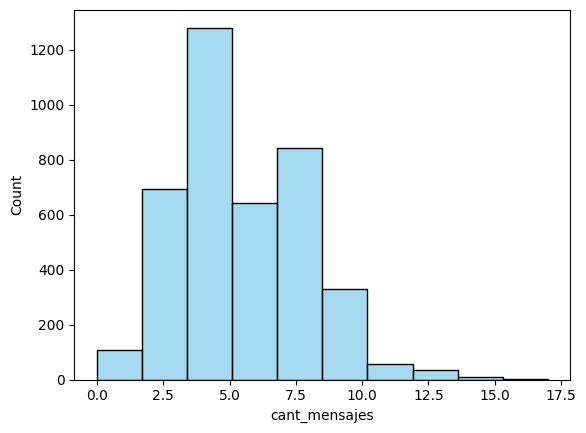

In [33]:
# Histograma para visualizar la cant_mensajes
sns.histplot(user_profile["cant_mensajes"],bins=10,color='skyblue')
plt.show()

💡Insights: 
- La mayoría de los usuarios mandan entre 3.3 a 5 mensajes, siendo pocos casi nulos aquellos que mandan más de 10 mensajes.

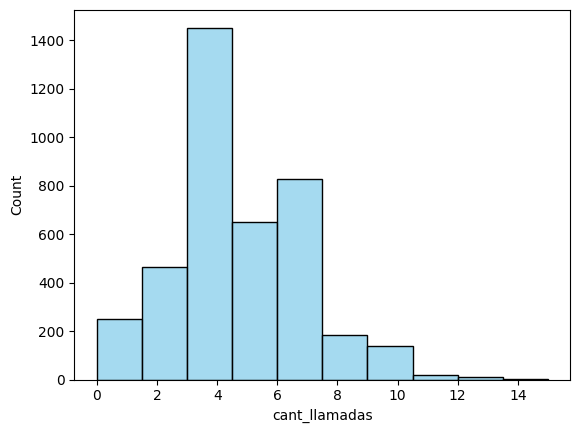

In [34]:
sns.histplot(user_profile["cant_llamadas"],bins=10,color='skyblue')
plt.show()# Histograma para visualizar la cant_llamadas


💡Insights: 
- Nuevamente la tendencia es marcadamente a la derecha, siendo entre 3 y 4 la cantidad que la mayoría de los usuarios realizan, mientras que es extremadamente raro que los usuarios realicen más de 10 llamadas.

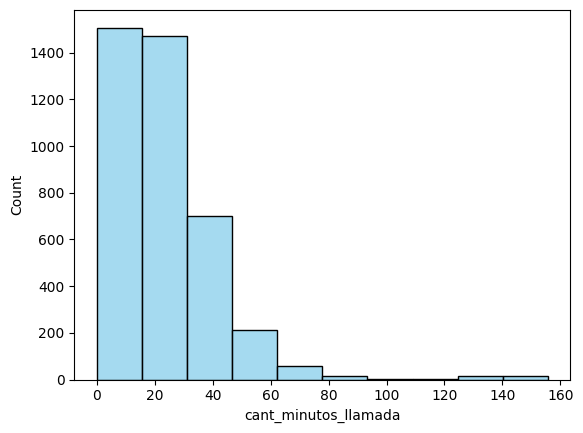

In [35]:
sns.histplot(user_profile["cant_minutos_llamada"],bins=10,color='skyblue')
plt.show()# Histograma para visualizar la cant_minutos_llamada


💡Insights: 
- En este caso la candidad de minutos en llamada por usuarios marca una tendencia aún más marcada a la derecha, siendo que la mayoría de usuarios marcaban un tiempo de llamada menor a 30 min.

### 5.2 Identificación de Outliers

🎯 **Objetivo:**  
Detectar valores extremos en las variables clave de **uso** y **clientes** que podrían afectar el análisis, y decidir si requieren limpieza o revisión adicional.

**Instrucciones:**  
- Usa **boxplots** para identificar visualmente outliers en las siguientes columnas:  
  - `age` 
  - `cant_mensajes`
  - `cant_llamadas`
  - `total_minutos_llamada`  
- Crea un **for** para generar los 4 boxplots automáticamente.
<br>

- Después de crear los gráfico, responde si **existen o no outliers** en las variables.  
- Si hay outliers, crea otro bucle para calcular los límites de esas columnas usando el **método IQR** y decide qué hacer con ellos.
  - Si solamente hay outliers de un solo lado, no es necesario calcular ambos límites.

**Hint:**
- Dentro del bucle, usa `plt.title(f'Boxplot: {col}')` para que el título cambie acorde a la columna.

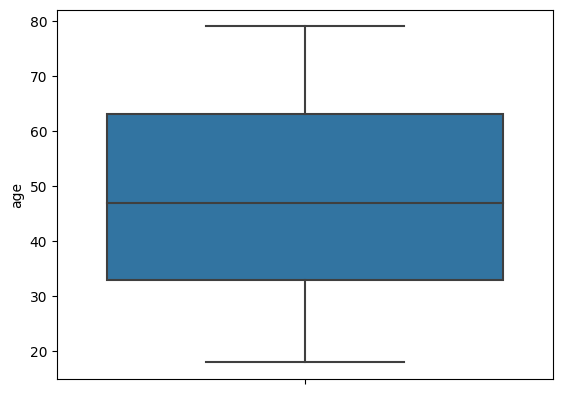

<Figure size 800x600 with 0 Axes>

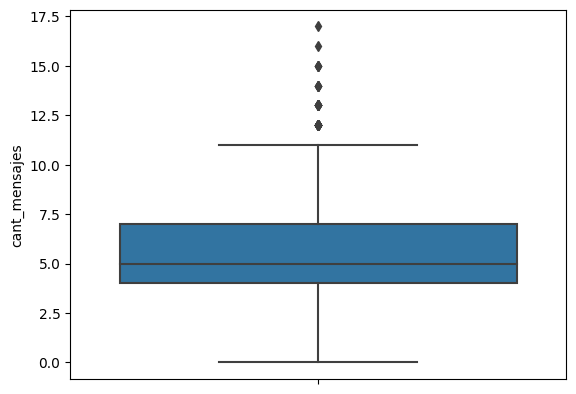

<Figure size 800x600 with 0 Axes>

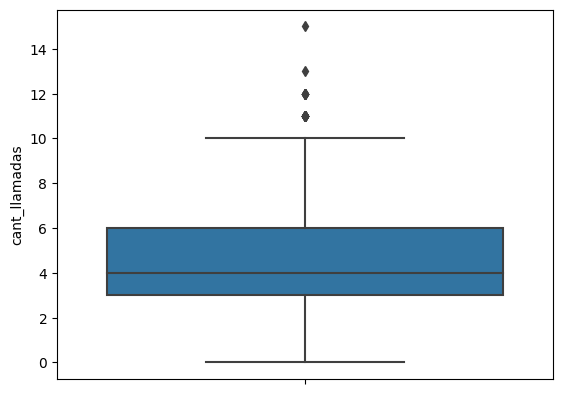

<Figure size 800x600 with 0 Axes>

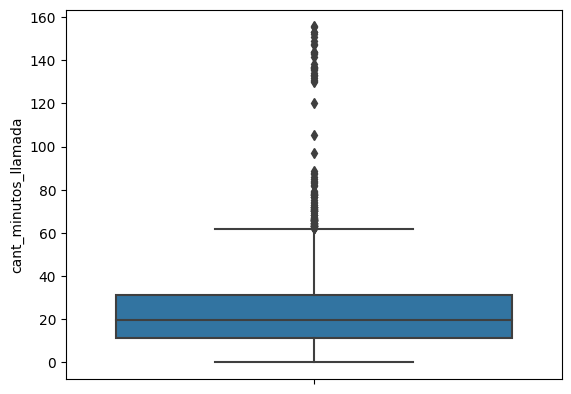

<Figure size 800x600 with 0 Axes>

In [36]:
# Visualizando usando BoxPlot 
columnas_numericas = ['age', 'cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada']

for col in columnas_numericas:
    sns.boxplot(y=user_profile[col]) 
    plt.figure(figsize=(8, 6))
    plt.show()

💡Insights: 
- Age: No presenta outliners.
- cant_mensajes: Presenta 6 valores outliners a la izquierda, es decir, valores atípicos altos.
- cant_llamadas: Presentan 4 valores outliners a la izquierda, es decir, valores atípicos altos.
- cant_minutos_llamada: Presenta varios valores atípicos a la izquierda.

In [37]:
# Calcular límites con el método IQR
columnas_limites = [ 'cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada']

for col in columnas_limites:
    Q1=user_profile[col].quantile(.25)
    Q3=user_profile[col].quantile(.75)
    IQR= Q3- Q1
    limite_superior=Q3+1.5*IQR
    outliners= user_profile[col]> limite_superior
    valores_atipicos= user_profile[col][outliners]
    print (user_profile[col])
    print (limite_superior)
    print(f"Valores atípicos en {col}:")
    print(valores_atipicos)



0        7
1        5
2        5
3       11
4        4
        ..
3994     6
3995     4
3996     5
3997     6
3998     3
Name: cant_mensajes, Length: 3999, dtype: int64
11.5
Valores atípicos en cant_mensajes:
315     13
347     13
356     12
384     12
456     12
539     14
591     12
670     12
903     12
908     14
987     12
1054    12
1158    15
1172    13
1196    17
1254    13
1281    12
1815    12
1830    13
2025    15
2043    12
2060    12
2175    13
2192    12
2301    15
2325    12
2375    12
2665    13
2675    15
2698    13
2793    12
2951    12
3093    12
3099    13
3254    12
3300    13
3344    12
3405    12
3474    14
3475    12
3628    12
3771    14
3818    16
3872    14
3892    12
3918    12
Name: cant_mensajes, dtype: int64
0        3
1       10
2        2
3        3
4        3
        ..
3994     3
3995     3
3996     3
3997     6
3998     6
Name: cant_llamadas, Length: 3999, dtype: int64
10.5
Valores atípicos en cant_llamadas:
116     11
417     12
777     12
778     1

In [38]:
# Revisa los limites superiores y el max, para tomar la decisión de mantener los outliers o no
user_profile[columnas_limites].describe()

,cant_mensajes,cant_llamadas,cant_minutos_llamada
count,3999.000000,3999.000000,3999.000000
mean,5.524381,4.478120,23.317054
std,2.358416,2.144238,18.168095
min,0.000000,0.000000,0.000000
25%,4.000000,3.000000,11.120000
50%,5.000000,4.000000,19.780000
75%,7.000000,6.000000,31.415000
max,17.000000,15.000000,155.690000


💡Insights: 
- cant_mensajes: recomiendo mantener los outliners debido a que, sí bien salen del los parámetros, en realidad no muestran una diferencia tan grande como para afectar demasiado los resultados
- cant_llamadas: recomiendo mantener los outliners debido a que, sí bien salen del los parámetros, en realidad no muestran una diferencia tan grande como para afectar demasiado los resultados
- cant_minutos_llamada: sería bueno revisar los outliners y no considerarlos tanto en el análisis ya que muchos valores representan diferencias muy amplias y pueden afectar el análsis.

---

## 🧩Paso 6: Segmentación de Clientes

### 6.1 Segmentación de Clientes Por Uso

🎯 **Objetivo:** Clasificar a cada usuario en un grupo de uso (Bajo uso, Uso medio, Alto uso) basándose en la cantidad de llamadas y mensajes registrados.

**Instrucciones:**  
- Crea una nueva columna llamada `grupo_uso` en el dataframe `user_profile`.
- Usa comparaciones lógicas (<, >) para evaluar las condiciones de llamadas y mensajes y asigna:
  - `'Bajo uso'` cuando llamadas < 5 y mensajes < 5
  - `'Uso medio'` cuando llamadas < 10 y mensajes < 10
  - `'Alto uso'` para el resto de casos

In [39]:
# Crear columna grupo_uso


user_profile["grupo_uso"] = np.where(
    (user_profile["cant_mensajes"] < 5) & (user_profile["cant_llamadas"] < 5), 
    'Bajo uso', 
    np.where(
        (user_profile["cant_mensajes"] < 10) & (user_profile["cant_llamadas"] < 10), 
        'Uso medio',
        'Alto uso'
    )
)

In [40]:
# verificar cambios
user_profile.head()

,user_id,cant_mensajes,cant_llamadas,cant_minutos_llamada,first_name,last_name,age,city,reg_date,plan,churn_date,reg_date_year,grupo_uso
0,10000,7,3,23.70,Carlos,Garcia,38,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,2022.0,Uso medio
1,10001,5,10,33.18,Mateo,Torres,53,NA,2022-01-01 06:34:17.914478619,Basico,NaN,2022.0,Alto uso
2,10002,5,2,10.74,Sofia,Ramirez,57,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,2022.0,Uso medio
3,10003,11,3,8.99,Mateo,Ramirez,69,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,2022.0,Alto uso
4,10004,4,3,8.01,Mateo,Torres,63,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,2022.0,Bajo uso


### 6.2 Segmentación de Clientes Por Edad

🎯 **Objetivo:**: Clasificar a cada usuario en un grupo por **edad**.

**Instrucciones:**  
- Crea una nueva columna llamada `grupo_edad` en el dataframe `user_profile`.
- Usa comparaciones lógicas (<, >) para evaluar las condiciones y asigna:
  - `'Joven'` cuando age < 30
  - `'Adulto'` cuando age < 60
  - `'Adulto Mayor'` para el resto de casos

In [41]:

user_profile["grupo_edad"] = np.where(
    (user_profile["age"] < 30) , 'Joven', 
    np.where(
        (user_profile["age"] < 60), 'Adulto', 
        'Adulto Mayor'))
        # Crear columna grupo_edad


In [42]:
# verificar cambios
user_profile.head()

,user_id,cant_mensajes,cant_llamadas,cant_minutos_llamada,first_name,last_name,age,city,reg_date,plan,churn_date,reg_date_year,grupo_uso,grupo_edad
0,10000,7,3,23.70,Carlos,Garcia,38,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,2022.0,Uso medio,Adulto
1,10001,5,10,33.18,Mateo,Torres,53,NA,2022-01-01 06:34:17.914478619,Basico,NaN,2022.0,Alto uso,Adulto
2,10002,5,2,10.74,Sofia,Ramirez,57,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,2022.0,Uso medio,Adulto
3,10003,11,3,8.99,Mateo,Ramirez,69,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,2022.0,Alto uso,Adulto Mayor
4,10004,4,3,8.01,Mateo,Torres,63,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,2022.0,Bajo uso,Adulto Mayor


### 6.3 Visualización de la Segmentación de Clientes

🎯 **Objetivo:** Visualizar la distribución de los usuarios según los grupos creados: **grupo_uso** y **grupo_edad**.

**Instrucciones:**  
- Crea dos gráficos para las variables categóricas `grupo_uso` y `grupo_edad`.
- Agrega título y etiquetas a los ejes en cada gráfico.

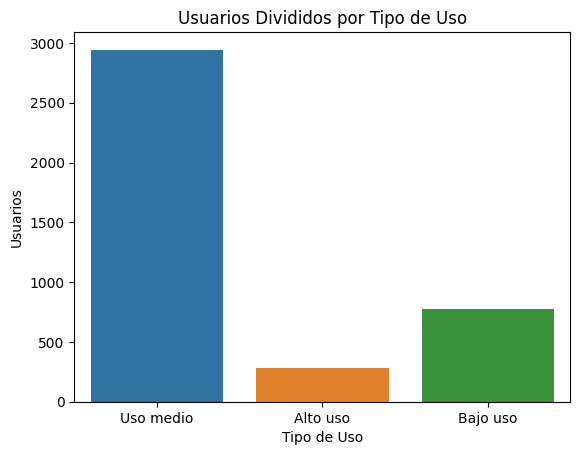

In [43]:
# Visualización de los segmentos por uso

sns.countplot( x= user_profile["grupo_uso"],data=user_profile)
plt.xlabel('Tipo de Uso')
plt.ylabel('Usuarios')
plt.title ('Usuarios Divididos por Tipo de Uso')

plt.show()


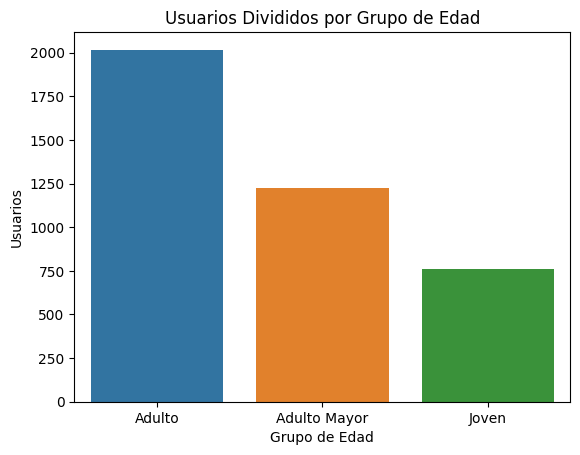

In [44]:
# Visualización de los segmentos por edad
sns.countplot( x= user_profile["grupo_edad"],data=user_profile)
plt.xlabel('Grupo de Edad')
plt.ylabel('Usuarios')
plt.title ('Usuarios Divididos por Grupo de Edad')

plt.show()



---
## 🧩Paso 7: Insight Ejecutivo para Stakeholders

🎯 **Objetivo:** Traducir los hallazgos del análisis en conclusiones accionables para el negocio, enfocadas en segmentación, patrones de uso y oportunidades comerciales.

**Preguntas a responder:** 
- ¿Qué problemas tenían originalmemte los datos?¿Qué porcentaje, o cantidad de filas, de esa columna representaban?

- ¿Qué segmentos de clientes identificaste y cómo se comportan según su edad y nivel de uso?

- ¿Qué segmentos parecen más valiosos para ConnectaTel y por qué?
    
- ¿Qué patrones de uso extremo (outliers) encontraste y qué implican para el negocio?

- ¿Qué recomendaciones harías para mejorar la oferta actual de planes o crear nuevos planes basados en los segmentos y patrones detectados?

✍️ **Escribe aquí tu análisis ejecutivo:**

### Análisis ejecutivo

⚠️ **Problemas detectados en los datos**
  - Se detectaron 5 fechas con datos nulos, solo una de ellas contaba con el 88% de datos nulos, por lo que fue descartada, con el resto se realizó limpieza de datos, sustituyendo los valores nulos o imposibles por NA y en el caso específico de la columna 'date',llevó a la creación de la columna 'date_year' para dejar fuera fechas imposibles.


🔍 **Segmentos por Edad**
- Joven (< 30 años)
- Adulto (< 60 años)
- Adulto Mayor (>= 60 años)


📊 **Segmentos por Nivel de Uso**
- Uso Bajo (cantidad de mensajes <5 y cantidad de llamadas < 5)
- Uso Medio (cantidad de mensajes <10 y cantidad de llamadas < 10)
- Uso Alto (cantidad de mensajes >= 10 y cantidad de llamadas >= 10)


➡️ Esto sugiere que ...
 -La mayoría de los clientes tienen un Uso medio, mientras que la mayoría de los usuarios son Adultos. Por lo que enfocar campañas a Adultos con nivel de Uso Medio deberían de ser la prioridad, pues forman la mayor parte de nuestra población.

⚠️ **Outliners**
 - En columnas como 'cant_mensajes', 'cant_llamadas', 'cant_minutos_llamadas', este tipo de valores se encontraron siempre a la izquierda, en lo que respecta a 'cant_mensajes' y 'cant_llamadas', si bien eran cantidades anómalas, no era tan marcada la diferencia como lo fue con 'cant_minutos_llamadas', donde la dispersión a la izquierda sí fue muy marcada. En todos los casos, estos numeros siguen siendo posibles en usuarios con consumo Alto, sin embargo, en el caso de cant_minutos_llamadas, las diferencias son demasiado grandes y estos valores podrían afectar análisis más específicos. 



💡 **Recomendaciones**
- Mantener la publicidad enfocada en el grupo de 30 a <60 años, pues estos son el grupo que genera mayores ventas, así mismo, la mayoría de los usuarios parecen no depender tanto de las llamadas y mensajes de texto, pues en su mayoría no pasaban de <10, por lo que convendría hacer este análisis con el uso del datos moviles, para ver que beneficios podieran atraer sin dejar de lado el uso mensajes y llamadas, pero, sin que estos sean el foco principal del plan.

---

## 🧩Paso 8 Cargar tu notebook y README a GitHub

🎯 **Objetivo:**  
Entregar tu análisis de forma **profesional**, **documentada** y **versionada**, asegurando que cualquier persona pueda revisar, ejecutar y entender tu trabajo.



### Opción A : Subir archivos desde la interfaz de GitHub (UI)

1. Descarga este notebook (`File → Download .ipynb`).  
2. Entra a tu repositorio en GitHub (por ejemplo `telecom-analysis` o `sprint7-final-project`).  
3. Sube tu notebook **Add file → Upload files**.  

---

### Opción B : Guardar directo desde Google Colab

1. Abre tu notebook en Colab.  
2. Ve a **File → Save a copy in GitHub**.  
3. Selecciona el repositorio y la carpeta correcta (ej: `notebooks/`).  
4. Escribe un mensaje de commit claro, por ejemplo:  
    - `feat: add final ConnectaTel analysis`
    - `agregar version final: Análisis ConnectaTel`
5. Verifica en GitHub que el archivo quedó en el lugar correcto y que el historial de commits se mantenga limpio.

---

Agrega un archivo `README.md` que describa de forma clara:
- el objetivo del proyecto,  
- los datasets utilizados,  
- las etapas del análisis realizadas,  
- cómo ejecutar el notebook (por ejemplo, abrirlo en Google Colab),  
- una breve guía de reproducción.
---

Link a repositorio público del proyecto: `LINK a tu repo aquí`